In [17]:
# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate
# for fixpoint table display
from itertools import combinations
# for iterating over sets
import matplotlib.pyplot as plt
# for modifying plots
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns

In [2]:
lrg = ginsim.load("/tmp/colomotouj_sfof__BCCFINAL.zginml")

In [3]:
ginsim.show(lrg)

In [4]:
ginsim_WT = lrg

In [5]:
fpoints = pd.read_csv('stable_states.csv')

In [6]:
model_biolqm = ginsim.to_biolqm(ginsim_WT) # convert to biolqm


MaBoSS simulation for cancer phenotype markers in the basal cell carcinoma state


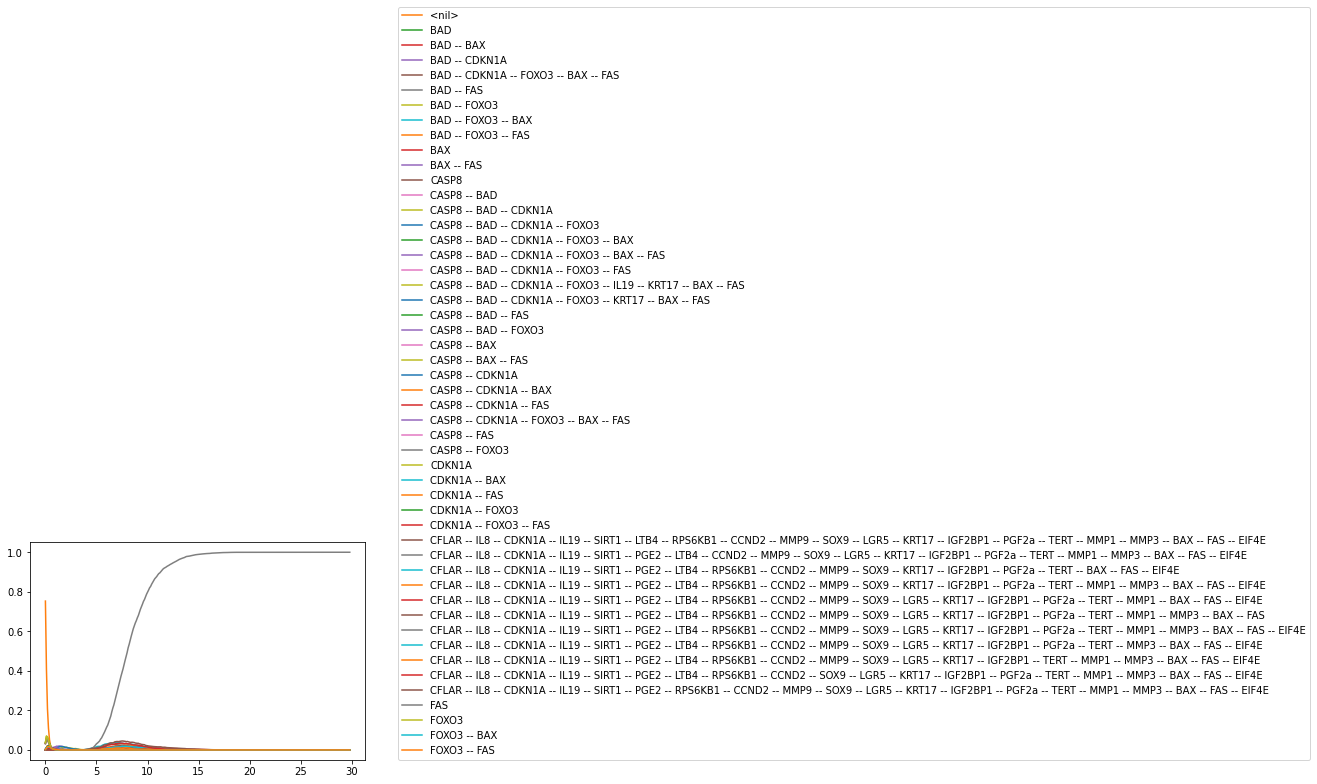

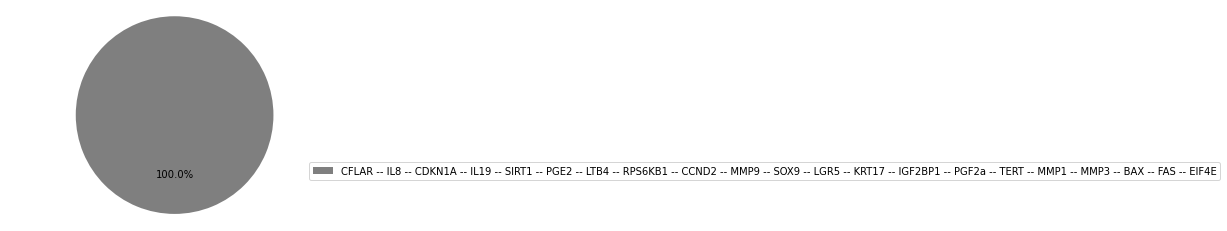

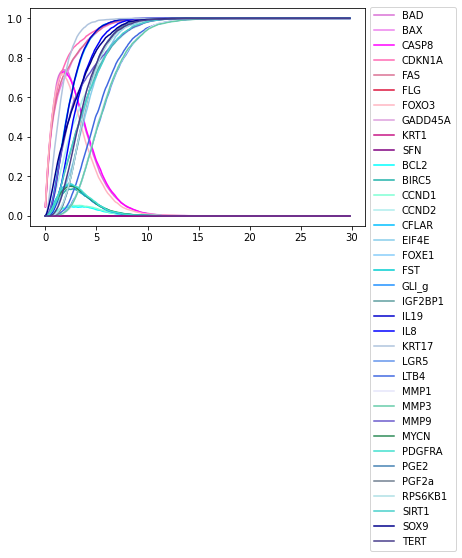

In [8]:
#MaBoSS for all of the cancer markers
# initials
maboss_BCC =  biolqm.to_maboss(model_biolqm)
maboss_BCC.network.set_istate("FZD", [0, 1])
maboss_BCC.network.set_istate("TNFRSF1A", [0, 1])
maboss_BCC.network.set_istate("IL22R", [0, 1])
maboss_BCC.network.set_istate("IL17R", [0, 1])
maboss_BCC.network.set_istate("EP2", [0, 1])
maboss_BCC.network.set_istate("IL6R", [0, 1])
maboss_BCC.network.set_istate("IL4R", [0, 1])
maboss_BCC.network.set_istate("DNAdam", [0, 1])

#Set the mutations
maboss_BCC.mutate("PTCH1", "OFF")
maboss_BCC.mutate("GNAS", "OFF")
maboss_BCC.mutate("TP53", "OFF")
maboss_BCC.mutate("VDR", "OFF")

#parameters and final nodes
maboss_BCC.update_parameters(sample_count=3000,time_tick=0.1, max_time=30)
Cancer_markers = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'EIF4E', 'CFLAR', 'SIRT1', 'FOXE1', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'KRT17', 'RPS6KB1', 'GLI_g', 'PGE2', 'IL8', 'IL19', 'FLG', 'KRT1', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'GADD45A', 'CDKN1A', 'SFN']
Apo_Arr_Diff = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'FLG', 'KRT1', 'GADD45A', 'CDKN1A', 'SFN']
maboss.set_output(maboss_BCC, Cancer_markers)

res_BCC_Cancer = maboss_BCC.run()
print("MaBoSS simulation for cancer phenotype markers in the basal cell carcinoma state")
res_BCC_Cancer.plot_trajectory(legend = True)
res_BCC_Cancer.plot_piechart()
#Choosing defined colors to separate cancer prom and prev phenotype
new_color = ['orchid','violet','cyan','lightseagreen','magenta','aquamarine', 'paleturquoise', 'hotpink','deepskyblue','skyblue','palevioletred', 'crimson', 'lightskyblue','lightpink' ,'darkturquoise','plum','dodgerblue','cadetblue','mediumblue','blue','mediumvioletred','lightsteelblue','cornflowerblue','royalblue','lavender','mediumaquamarine','slateblue','seagreen','turquoise','steelblue','slategrey','powderblue','purple','mediumturquoise','darkblue','darkslateblue']
BCC_figure = res_BCC_Cancer.get_nodes_probtraj().plot(legend=True, color = new_color)
#Ordering the genes after color
handles,labels = BCC_figure.get_legend_handles_labels()
order = [0,1,4,7,10,11,13,15,20,32,2,3,5,6,8,9,12,14,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,33,34,35]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.00,1.03), loc="upper left")
BCC_figure.figure.savefig('MaBoSS_BCC_condidition_REAL.pdf', dpi = 300)

In [18]:
BCC_allinputs = maboss_BCC.copy

In [11]:
model_maboss = biolqm.to_maboss(model_biolqm) # convert to maboss
model_maboss.update_parameters(sample_count=5000,max_time=40, time_tick=0.5, thread_count=6)

In [12]:
# For all nodes of the network, set the initial state to random
for n in model_maboss.network:
    model_maboss.network.set_istate(n,[0.5,0.5])
    
WT_allinputs = model_maboss.copy()

In [13]:
WT_allinputs.print_cfg()

$nb_mutable = 0;
$u_TNFRSF1A = 1;
$d_TNFRSF1A = 1;
$u_TRAF6 = 1;
$d_TRAF6 = 1;
$u_TAK1 = 1;
$d_TAK1 = 1;
$u_IKBKB = 1;
$d_IKBKB = 1;
$u_NFKBIA = 1;
$d_NFKBIA = 1;
$u_NFKBIZ = 1;
$d_NFKBIZ = 1;
$u_IKBKG = 1;
$d_IKBKG = 1;
$u_NFKB = 1;
$d_NFKB = 1;
$u_TNFAIP3 = 1;
$d_TNFAIP3 = 1;
$u_P38 = 1;
$d_P38 = 1;
$u_ERK1_2 = 1;
$d_ERK1_2 = 1;
$u_JNK = 1;
$d_JNK = 1;
$u_MNK1 = 1;
$d_MNK1 = 1;
$u_PIK3R1 = 1;
$d_PIK3R1 = 1;
$u_PDPK1 = 1;
$d_PDPK1 = 1;
$u_AKT = 1;
$d_AKT = 1;
$u_AP1 = 1;
$d_AP1 = 1;
$u_CREB1 = 1;
$d_CREB1 = 1;
$u_PRKACA = 1;
$d_PRKACA = 1;
$u_RIPK1 = 1;
$d_RIPK1 = 1;
$u_TRADD = 1;
$d_TRADD = 1;
$u_TRAF2 = 1;
$d_TRAF2 = 1;
$u_FADD = 1;
$d_FADD = 1;
$u_CASP8 = 1;
$d_CASP8 = 1;
$u_CFLAR = 1;
$d_CFLAR = 1;
$u_IL8 = 1;
$d_IL8 = 1;
$u_BAD = 1;
$d_BAD = 1;
$u_BCL2 = 1;
$d_BCL2 = 1;
$u_CDKN1A = 1;
$d_CDKN1A = 1;
$u_CCND1 = 1;
$d_CCND1 = 1;
$u_STAT1 = 1;
$d_STAT1 = 1;
$u_IL36 = 1;
$d_IL36 = 1;
$u_IL17R = 1;
$d_IL17R = 1;
$u_CEBP = 1;
$d_CEBP = 1;
$u_IL19 = 1;
$d_IL19 = 1;
$u_IL22R = 1;
$d_IL22

In [14]:
# Select outputs for visualisation of the results
WT_allinputs.network.set_output(('Apoptosis', 'Proliferation', 'Survival', 'Differentiation', 'Tissue_remodelling_Angiogenesis', 'Cell_cycle_arrest'))
run_WT_allinputs = WT_allinputs.run()

/opt/conda/lib/python3.9/site-packages/maboss/figures.py:113: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(prob_list, labels=labels, colors=color_list)


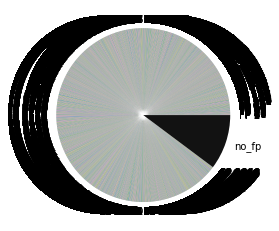

In [15]:
run_WT_allinputs.plot_fixpoint()

Text(0.5, 1.0, 'WT entropy')

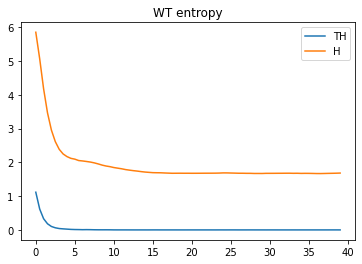

In [16]:
run_WT_allinputs.plot_entropy_trajectory()
plt.title('WT entropy')

Text(0.5, 1.0, 'Wild type conditions')

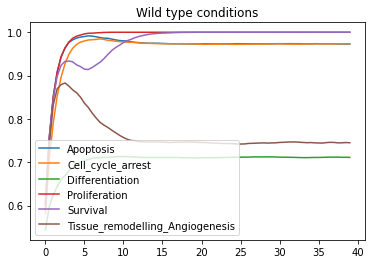

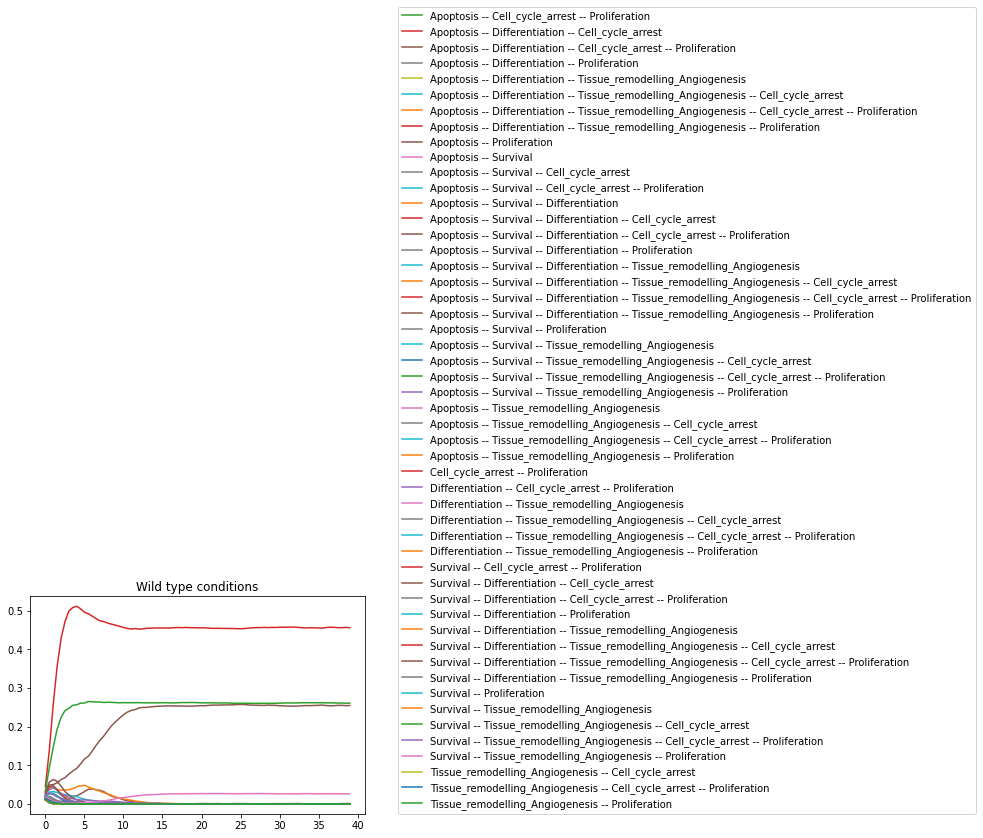

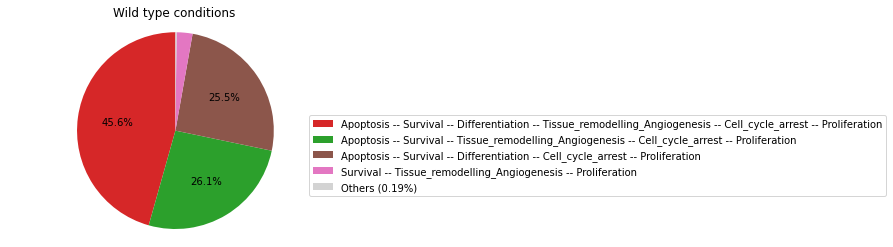

In [17]:
#Simulation with random initial conditions 
#Plot the results of the WT simulation
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)
plt.title('Wild type conditions')

run_WT_allinputs.plot_trajectory(legend=True)
plt.title('Wild type conditions')

# Plot pie chart
run_WT_allinputs.plot_piechart()
plt.title('Wild type conditions')

# Note that the model state <nil> means that none of the external variables are ON. 
# figure = run_WT_allinputs.get_states_probtraj().plot()
# save_figure(figure, 'WT')

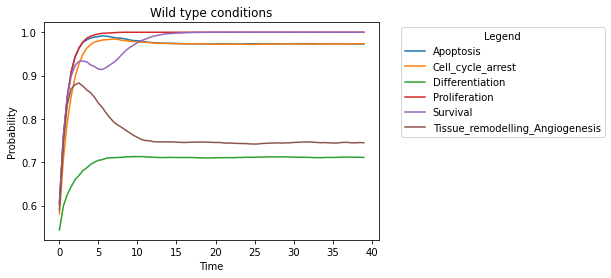

In [21]:
prob_traj = run_WT_allinputs.get_nodes_probtraj()

# Plotting the data
prob_traj.plot(legend=False)
plt.title('Wild type conditions')
plt.xlabel('Time')  # assuming the x-axis represents time
plt.ylabel('Probability')  # adjust depending on what 'probtraj' represents
plt.grid(False)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()